<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n20.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.470615,33.261106,65.305331,-0.000197,190.036855,190.037030,-0.000176
1,0.0,1.0,92.863420,47.819294,85.627148,0.000151,236.310013,236.309880,0.000133
2,0.0,2.0,68.368596,72.417761,96.699836,0.000009,247.486202,247.486210,-0.000008
3,0.0,3.0,55.281411,53.196714,47.338817,-0.000112,165.816830,165.816902,-0.000072
4,0.0,4.0,63.185189,42.163546,40.445231,-0.000205,155.793762,155.793921,-0.000160
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,35.350706,32.482099,86.492307,0.000378,164.325489,164.325144,0.000345
59996,999.0,56.0,47.193957,60.433707,20.790926,0.000053,138.418643,138.418571,0.000072
59997,999.0,57.0,65.187161,39.045467,47.026782,-0.000233,161.259176,161.259438,-0.000261
59998,999.0,58.0,31.406007,74.203899,25.801678,0.000038,141.411622,141.411549,0.000073


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.470615,33.261106,65.305331,-0.000197,190.036855,190.037030,-0.000176
1,0.0,1.0,92.863420,47.819294,85.627148,0.000151,236.310013,236.309880,0.000133
2,0.0,2.0,68.368596,72.417761,96.699836,0.000009,247.486202,247.486210,-0.000008
3,0.0,3.0,55.281411,53.196714,47.338817,-0.000112,165.816830,165.816902,-0.000072
4,0.0,4.0,63.185189,42.163546,40.445231,-0.000205,155.793762,155.793921,-0.000160
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,35.350706,32.482099,86.492307,0.000378,164.325489,164.325144,0.000345
59996,999.0,56.0,47.193957,60.433707,20.790926,0.000053,138.418643,138.418571,0.000072
59997,999.0,57.0,65.187161,39.045467,47.026782,-0.000233,161.259176,161.259438,-0.000261
59998,999.0,58.0,31.406007,74.203899,25.801678,0.000038,141.411622,141.411549,0.000073


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    81.470615  33.261106  65.305331  ...  190.036855  190.037030 -0.000176
      1.0    92.863420  47.819294  85.627148  ...  236.310013  236.309880  0.000133
      2.0    68.368596  72.417761  96.699836  ...  247.486202  247.486210 -0.000008
      3.0    55.281411  53.196714  47.338817  ...  165.816830  165.816902 -0.000072
      4.0    63.185189  42.163546  40.445231  ...  155.793762  155.793921 -0.000160
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   35.350706  32.482099  86.492307  ...  164.325489  164.325144  0.000345
      56.0   47.193957  60.433707  20.790926  ...  138.418643  138.418571  0.000072
      57.0   65.187161  39.045467  47.026782  ...  161.259176  161.259438 -0.000261
      58.0   31.406007  74.203899  25.801678  ...  141.411622  141.411549  0.000073
      59.0   50.611013  46.208323  48.224790  ...  155.044181  155.044138  0.000043

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    81.470615  33.261106  65.305331  ...  190.036855  190.037030 -0.000176
      1.0    92.863420  47.819294  85.627148  ...  236.310013  236.309880  0.000133
      2.0    68.368596  72.417761  96.699836  ...  247.486202  247.486210 -0.000008
      3.0    55.281411  53.196714  47.338817  ...  165.816830  165.816902 -0.000072
      4.0    63.185189  42.163546  40.445231  ...  155.793762  155.793921 -0.000160
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   35.350706  32.482099  86.492307  ...  164.325489  164.325144  0.000345
      56.0   47.193957  60.433707  20.790926  ...  138.418643  138.418571  0.000072
      57.0   65.187161  39.045467  47.026782  ...  161.259176  161.259438 -0.000261
      58.0   31.406007  74.203899  25.801678  ...  141.411622  141.411549  0.000073
      59.0   50.611013  46.208323  48.224790  ...  155.044181  155.044138  0.000043

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.470615,33.261106,65.305331,-0.000197,190.036855,190.037030,-0.000176
1,0.0,1.0,92.863420,47.819294,85.627148,0.000151,236.310013,236.309880,0.000133
2,0.0,2.0,68.368596,72.417761,96.699836,0.000009,247.486202,247.486210,-0.000008
3,0.0,3.0,55.281411,53.196714,47.338817,-0.000112,165.816830,165.816902,-0.000072
4,0.0,4.0,63.185189,42.163546,40.445231,-0.000205,155.793762,155.793921,-0.000160
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,35.350706,32.482099,86.492307,0.000378,164.325489,164.325144,0.000345
59996,999.0,56.0,47.193957,60.433707,20.790926,0.000053,138.418643,138.418571,0.000072
59997,999.0,57.0,65.187161,39.045467,47.026782,-0.000233,161.259176,161.259438,-0.000261
59998,999.0,58.0,31.406007,74.203899,25.801678,0.000038,141.411622,141.411549,0.000073


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    81.470615  33.261106  65.305331  ...  190.036855  190.037030 -0.000176
      1.0    92.863420  47.819294  85.627148  ...  236.310013  236.309880  0.000133
      2.0    68.368596  72.417761  96.699836  ...  247.486202  247.486210 -0.000008
      3.0    55.281411  53.196714  47.338817  ...  165.816830  165.816902 -0.000072
      4.0    63.185189  42.163546  40.445231  ...  155.793762  155.793921 -0.000160
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   35.350706  32.482099  86.492307  ...  164.325489  164.325144  0.000345
      56.0   47.193957  60.433707  20.790926  ...  138.418643  138.418571  0.000072
      57.0   65.187161  39.045467  47.026782  ...  161.259176  161.259438 -0.000261
      58.0   31.406007  74.203899  25.801678  ...  141.411622  141.411549  0.000073
      59.0   50.611013  46.208323  48.224790  ...  155.044181  155.044138  0.000043

[60000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

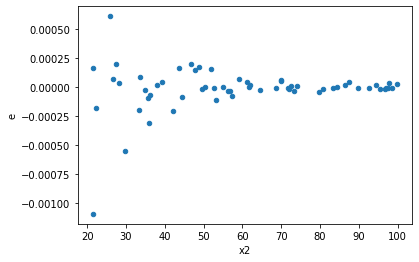

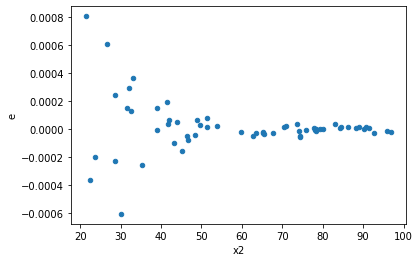

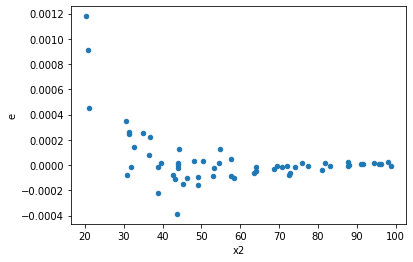

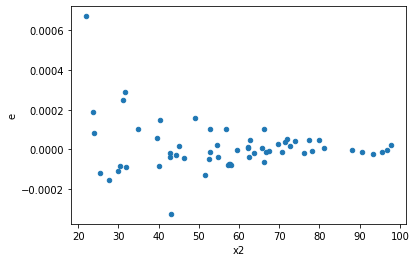

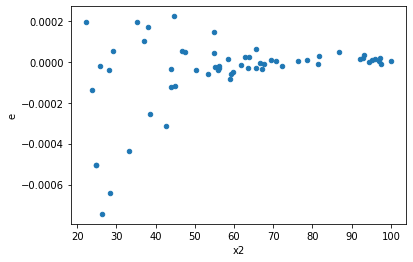

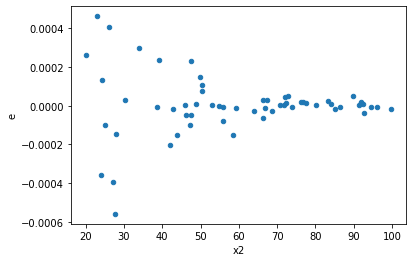

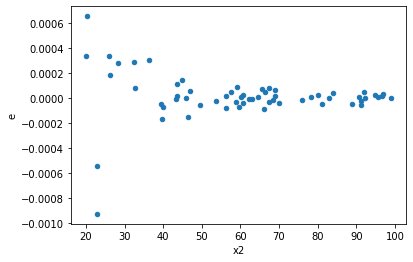

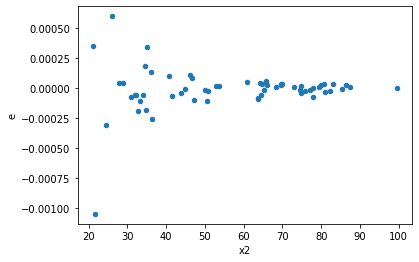

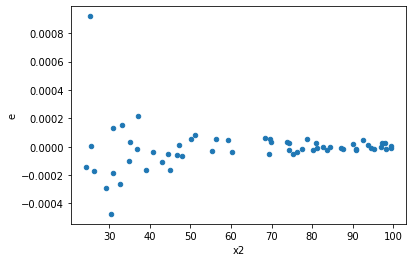

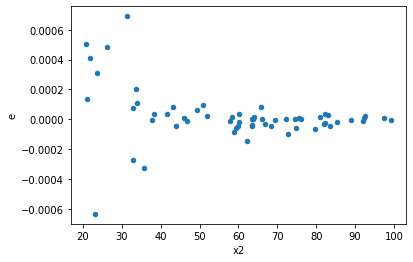

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,1.4934777162354967e-08,2.1008554568457783e-06,7.467388581177484e-10,1.0504277284228892e-07,0.007108902763247702,8.754789219307964e-18,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,1.1586954818694982e-08,1.9652772486711975e-06,5.793477409347491e-10,9.826386243355988e-08,0.0058958372547839675,1.2562557066506144e-18,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,8.343988204506506e-09,8.620040776268016e-07,4.171994102253253e-10,4.3100203881340075e-08,0.009679754911923948,2.1314574716397604e-16,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,2.3225171033368108e-08,6.560401151566356e-07,1.1612585516684054e-09,3.2802005757831785e-08,0.03540205925947514,1.078283258472162e-10,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,9.52139690617415e-09,1.442767653406247e-06,4.760698453087074e-10,7.213838267031235e-08,0.006599397265176394,4.048791833673497e-18,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,9.095812718626088e-09,1.2113693861416488e-06,4.5479063593130443e-10,6.056846930708244e-08,0.007508702814091498,1.5432875634222874e-17,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,2.8132584113335004e-08,1.9482212373356183e-06,1.4066292056667502e-09,9.741106186678092e-08,0.014440138303701609,1.2985642605955731e-14,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,1.630702730323198e-08,1.9158019033292334e-06,8.153513651615989e-10,9.579009516646167e-08,0.008511854631156817,5.649197153363941e-17,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,1.0976041442396115e-08,1.4350339271400996e-06,5.488020721198058e-10,7.175169635700499e-08,0.007648628534009945,1.8684732513484903e-17,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64